## Defining a vector-space
Let's begin with an example. Consider the following three sentences, that may have each originated from an aviation safety narrative:

A - I lost control of the airplane

B - Air traffic control told us that they lost our mode-c

C - I let go of the airplane control column

If we ignore the "stop words" (those that have purely mechanical use in the language) and the words that are only used in a single sentence, we may focus only on the words "lost," "control," and "airplane." If we count the occurance of each of these words in each sentence, we can construct a vector for each as follows:

In [146]:
A <- c(1,1,1)
B <- c(1,1,0)
C <- c(0,1,1)
rows <- c('lost','control','airplane')

docs <- cbind(A,B,C)
docs

A,B,C
1,1,0
1,1,1
1,0,1


Our matrix (docs) or vector-space now corresponds to a sub-set of the information contained in the three sentences. Note that we have lost words and order of the remaining words. We are simple counting the occurance of selected words in each sentence given. Since the sentences are now vectors (and coincidently only containing 3 dimensions), we can plot them on a diagram, where the x, y, and z axes, represent 'lost,' 'control,' 'airplane,' respectively.

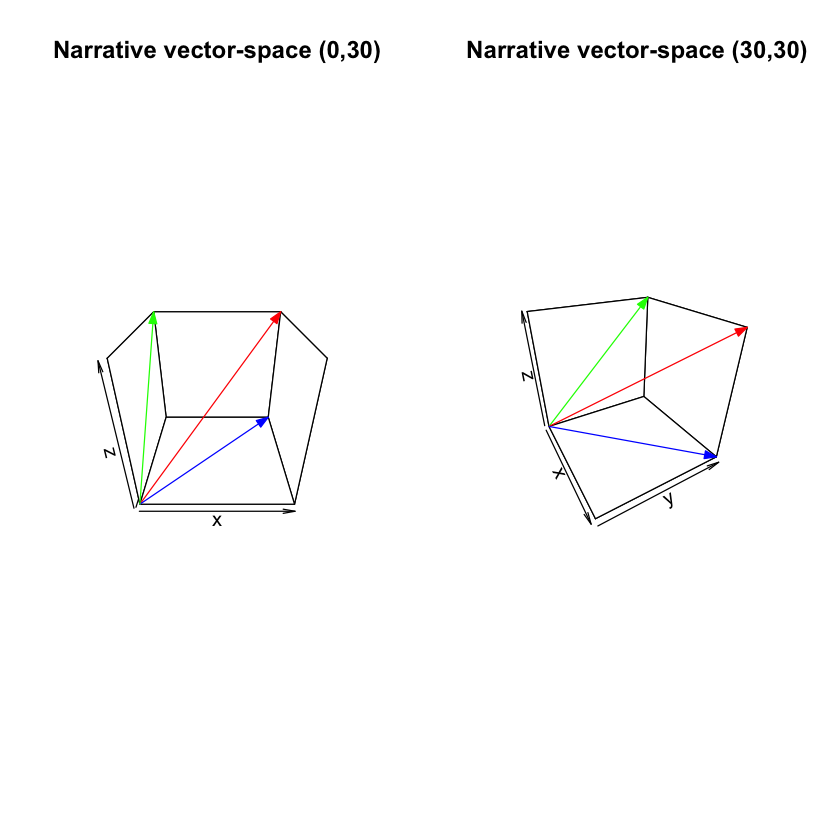

In [147]:
#install.packages("plot3D", dependencies=TRUE)
library(plot3D)
par(mfrow = c(1, 2))
arrows3D(x0 = c(0,0,0), y0 = c(0,0,0), z0 = c(0,0,0),
         x1 = docs[1,], y1 = docs[2,], z1 = docs[3,],
         col=c("red","blue","green"), theta=0, phi=30,
         main = "Narrative vector-space (0,30)")
arrows3D(x0 = c(0,0,0), y0 = c(0,0,0), z0 = c(0,0,0),
         x1 = docs[1,], y1 = docs[2,], z1 = docs[3,],
         col=c("red","blue","green"), theta=60, phi=30,
         main = "Narrative vector-space (30,30)")

Visually, you can see that the vectors for each document point in the same general direction within the vector-space. Were we to draw a fourth arrow with a head between the heads of the three document vectors, we could define a new vector that would decribe most of the "direction" of the documents. If we guess at a value for the "strongest direction" (or principal direction) collectively of the document vectors, it would be half along the x and z axes and a little more than half way along the y axis.

We can then define another vector that decribes the next most amount of document "direction." We can then repreat the process until we have as many vectors as there are documents in the document vector-space. If we require that each new vector we define is orthonormal (at a right angle) to each of the other new vectors, we have a transformed space in which each dimension uniquely describes "direction" and is in rank order of descriptive ability. This process is called singular-value-decomposition and is the foundation of latent semantic analysis (LSA) and principal component analysis (PCA).

## An alternate interpretation
Suppose that we develop a survey to measure Hofstede's concepts of culture. One aspect of which is power-distance. In the first step of the process, we write a number of questions where respondents who are most comfortable with a steep heirachy score the questions in one way and those less comfortable with heirarchy another. By design, respondents should produce scores for each of these questions that follow the latent (hidden) concept of power-distance. In designing the survey you would similarly design questions for individualism, masculinity, and uncertainty avoidance.

Were we to plot survey question responses on a diagram where each question had its own dimension (we can only visualize this for three dimensions...), if Hofstede's model is consistent we should see common "directions" within the vector-space that describe the most information. These latent concepts should exhibit themselves through the singular-value-decomposition.

## Singular value decompostion
The SVD calculation separates a single matrix into two orthonormal matrices (U and V) and a central diagonal scaling matrix (\sigma). It is commonly written as follows:
$$\begin{align}
X =& U \sigma V^T \\
X_{d\times n} =& U_{d\times m} \sigma_{m\times m} V_{n\times m}^T
\end{align}$$
NOTE: The theory and method for actually decomposing the matrix X is beyond the scope of this notebook. However, be aware that its calculation begins with the assignment of randomized values which through iteration converge towards the solution. Therefor, the calculation is NOT deterministic and will change for overly sparse matrices.

For our document vector-space the calculation results in the following:

In [148]:
lsa <- svd(docs)
d <- diag(lsa$d) #Pad the diagonal into a complete matrix
round(lsa$u,2)
round(d,2)
round(lsa$v,2)
round(t(lsa$v),2) #The transposed V matrix

-0.50,-0.71,0.50
-0.71,0.00,-0.71
-0.50,0.71,0.50


2.41,0,0.00
0.00,1,0.00
0.00,0,0.41


-0.71,0.00,0.71
-0.50,-0.71,-0.50
-0.50,0.71,-0.50


-0.71,-0.50,-0.50
0.00,-0.71,0.71
0.71,-0.50,-0.50


Writing the result in terms of the equation:
$$\begin{align}
X =& U \sigma V^T \\
=& \begin{bmatrix} -0.50 & -0.71 & 0.50 \\ -0.71 & 0 & -0.71 \\ -0.50 & 0.71 & 0.50 \end{bmatrix} \begin{bmatrix} 2.41 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0.41 \end{bmatrix} \begin{bmatrix} -0.71 & 0 & 0.71 \\ -0.50 & -0.71 & -0.50 \\ -0.50 & 0.71 & -0.50 \end{bmatrix} \\
=& \begin{bmatrix} -0.50 & -0.71 & 0.50 \\ -0.71 & 0 & -0.71 \\ -0.50 & 0.71 & 0.50 \end{bmatrix} \begin{bmatrix} 2.41 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0.41 \end{bmatrix} \begin{bmatrix} -0.71 & -0.50 & -0.50 \\ 0 & -0.71 & 0.71 \\ 0.71 & -0.50 & -0.50 \end{bmatrix}^T
\end{align}$$

## Interpretation of the decomposed matrix
Given the components of our document vector-space we can consider how to evaluate each of them. From the U matrix:
$$\begin{align}
U =& \begin{bmatrix} -0.50 & -0.71 & 0.50 \\ -0.71 & 0 & -0.71 \\ -0.50 & 0.71 & 0.50 \end{bmatrix}
\end{align}$$
The U matrix has the same number of rows as there are words in the LSA narratives and the same number of columns as there are documents/sentences. Hence, each column defines the weighting of each word in the principal directions in the space. Under this interpretation, the strongest principal direction is weighted as -0.5, -0.71, and -0.5 on 'lost,' 'control,' 'airplane,' respectively.

In LSA terms, this principal direction found is considered to be a "topic" or "theme." The topic represents words that are commonly used together in a themeatic manner. In PCA terms, this is a component and represents a latent/theoretical concept (such as power-distance).

Since the topics are given as a unit vector in terms of word components, we can plot the topics on the same diagram as the documents themselves. Here the topics are show in shades of gray, with the strongest component in a darker shade. Four different orientations are shown to better get a sense of the three dimensional reality.

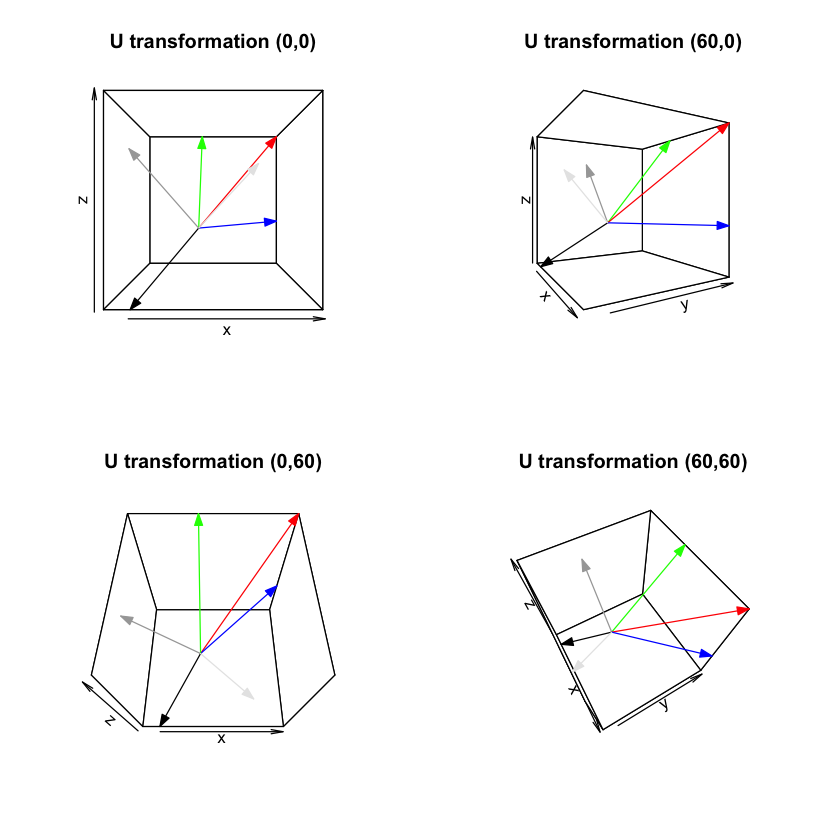

In [149]:
orig <- matrix(0L, nrow=3, ncol=6) #Base of the vectors
tip <- cbind(docs[,1], docs[,2], docs[,3],
             lsa$u[,1], lsa$u[,2], lsa$u[,3]) #Tips of the vectors
ucol <- gray.colors(3, start = 0, end = 0.9,
                    gamma = 2.2, alpha = NULL) #Gray color scheme for the topics
par(mfrow = c(2, 2))
arrows3D(x0 = orig[1,], y0 = orig[2,], z0 = orig[3,],
         x1 = tip[1,], y1 = tip[2,], z1 = tip[3,], theta=0, phi=0,
         col=c("red", "blue", "green", ucol[1], ucol[2], ucol[3]),
         main = "U transformation (0,0)")
arrows3D(x0 = orig[1,], y0 = orig[2,], z0 = orig[3,],
         x1 = tip[1,], y1 = tip[2,], z1 = tip[3,], theta=60, phi=00,
         col=c("red", "blue", "green", ucol[1], ucol[2], ucol[3]),
         main = "U transformation (60,0)")
arrows3D(x0 = orig[1,], y0 = orig[2,], z0 = orig[3,],
         x1 = tip[1,], y1 = tip[2,], z1 = tip[3,], theta=0, phi=60,
         col=c("red", "blue", "green", ucol[1], ucol[2], ucol[3]),
         main = "U transformation (0,60)")
arrows3D(x0 = orig[1,], y0 = orig[2,], z0 = orig[3,],
         x1 = tip[1,], y1 = tip[2,], z1 = tip[3,], theta=60, phi=60,
         col=c("red", "blue", "green", ucol[1], ucol[2], ucol[3]),
         main = "U transformation (60,60)")

## The V matrix
The V matrix has the same number of columns as there are documents in the LSA narratives. We can think of the V matrix as the weight of each document within each topic. Hence, document A has weightings of -0.71, 0, and 0.71 on topic 1, respectively.

$$\begin{align}
V =& \begin{bmatrix} -0.71 & -0.50 & -0.50 \\ 0 & -0.71 & 0.71 \\ 0.71 & -0.50 & -0.50 \end{bmatrix}
\end{align}$$

## The sigma matrix
The central \sigma matrix is diagonal, meaning that it scales the values of a matrix/vector that it operates on without changing the relationship between them. In our case, the sigma matrix tells us about the usage of our newly defined principal directions. 
$$\begin{align}
\sigma =& \begin{bmatrix} 2.41 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0.41 \end{bmatrix}
\end{align}$$
Here we can see that the third principal direction has the lowest weighting, meaning that it describes the least amount of information. This is where the key insight lies.

If we assume that there is noise in our system, whether from differring word choices or survey question interpretation, we now have a mechanism to remove it.

## Truncating the sigma matrix
Given that the last entry in the \sigma matrix decribes the least amount of information in our system, if we remove it (just set the value to zero) what happens? Let's first confirm that when our matrices are multiplied we get the expected result and then compare this to the truncated outcome:
$$\begin{align}
X =& U \sigma V^T \\
=& \begin{bmatrix} -0.50 & -0.71 & 0.50 \\ -0.71 & 0 & -0.71 \\ -0.50 & 0.71 & 0.50 \end{bmatrix} \begin{bmatrix} 2.41 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0.41 \end{bmatrix} \begin{bmatrix} -0.71 & 0 & 0.71 \\ -0.50 & -0.71 & -0.50 \\ -0.50 & 0.71 & -0.50 \end{bmatrix}^T \\
X^{\prime} =& U \sigma^{\prime} V^T \\
=& \begin{bmatrix} -0.50 & -0.71 & 0.50 \\ -0.71 & 0 & -0.71 \\ -0.50 & 0.71 & 0.50 \end{bmatrix} \begin{bmatrix} 2.41 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} -0.71 & 0 & 0.71 \\ -0.50 & -0.71 & -0.50 \\ -0.50 & 0.71 & -0.50 \end{bmatrix}^T \\
=& \begin{bmatrix} -0.50 & -0.71 \\ -0.71 & 0 \\ -0.50 & 0.71 \end{bmatrix} \begin{bmatrix} 2.41 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} -0.71 & 0 \\ -0.50 & -0.71 \\ -0.50 & 0.71 \end{bmatrix}^T
\end{align}$$

Since the last entry of the \sigma matrix has been zeroed, we can drop the last column of the U matrix and last column of the V^T matrix.

In [150]:
X <- lsa$u %*% d %*% t(lsa$v) #The %*% operator completes a matrix multiplocation
round(X, 1) #The original word/sentence matrix is reconstructed

1,1,0
1,1,1
1,0,1


This time, let's calculate the outcome with the final value of the \sigma matrix substituted with a zero.

In [151]:
dp <- d #Assign a new d prime matrix
dp[3,3] <- 0 #Zero the final value
Xp <- lsa$u %*% dp %*% t(lsa$v) #Recalculate the original matrix with the "noise" removed
round(Xp, 1)

0.9,1.1,0.1
1.2,0.9,0.9
0.9,0.1,1.1


We can see that the truncated \sigma matrix results in a matrix X', that is very close to the original X matrix description. In this manner we can reduce the "noise" or error in the description of a system.

The question then becomes, where does the noise stop and the signal begin? Or in mathematical terms, how many dimensions of the \sigma matrix should be retained?

## How many factors should be retained?
There are two main approaches to deciding where the noise ends and the signal begins when reducing the dimensionality of the data. You may estimate the transition point by ploting the \sigma values, just select by values, or measure the entropy of the model against a randomized form. Here, we will only discuss the first two.

In the Scree test or "hockey stick" approach, you simply plot the \sigma values and estimate where the curve transitions to a shallower profile. For the Kaiser criterion, only values >= 1 are retained. Let's plot our existing sigma diagonal:

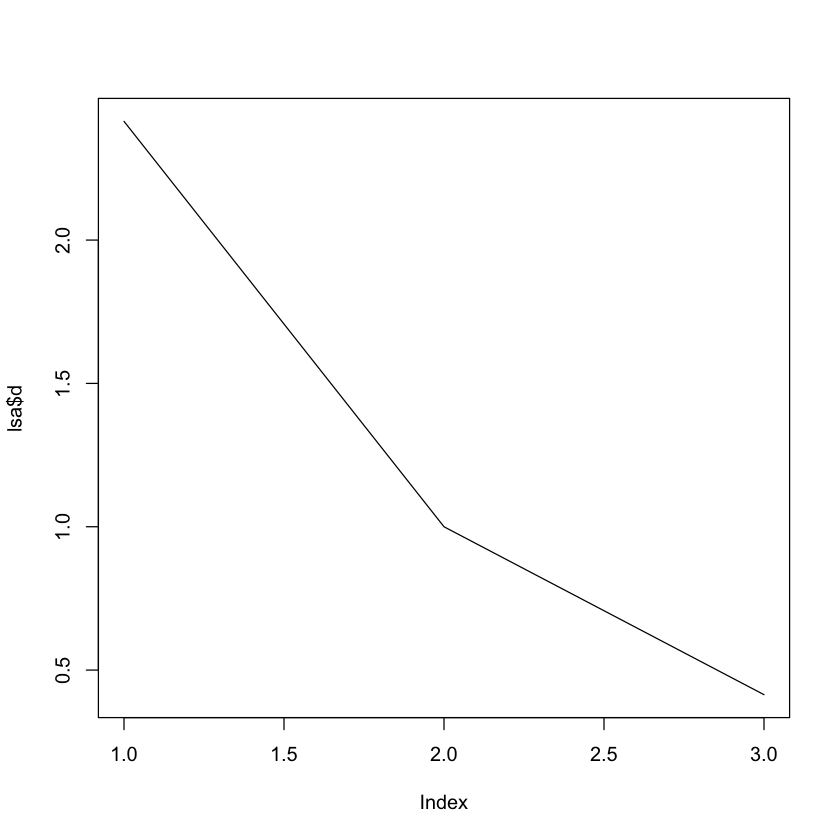

In [152]:
plot(lsa$d, type="l")

We can see from the curve that the first two values of \sigma provide the most information. The shallowing of the curve occurs between the second and third values, which would imply that if we remove the third value from the calculation, we will improve our signal-to-noise ratio. The third value also falls below 1 and does not meet the Kaiser criterion.

## LSA versus PCA
The demonstration so far has been for the latent semantic analysis approach to finding the best linear subspace description of the data. We began by creating a matrix of word occurance for each document (also known as a term-document matrix). It is in this first step that PCA differs from LSA. Rather than using the term-document matrix, PCA contructs the covariance matrix. The covariance matrix is the scaled mean difference of the originating matrix multipled by its transpose:

In [162]:
mm <- matrix(data=1,nrow=nrow(docs)) %*% cbind(mean(A),mean(B),mean(C)) #mean matrix
dm <- docs - mm #difference matrix
cm <- (nrow(docs)-1)**-1 * t(dm) %*% dm #The scaling term includes Bessel's correction
round(cm, 2)
#cov(docs) #cov is the function in R

,A,B,C
A,0,0.00,0.00
B,0,0.33,-0.17
C,0,-0.17,0.33


### Covariance matrix
Assuming that n is the number of documents and n=j=l, we can write this as:
$$\begin{align}
\bar{X}_j =& \frac{1}{n} \sum_{i=1}^n X_{ij} \\
Y_{ij} =& X_{ij} - \bar{X}_j \\
\Phi_{jl} =& \frac{1}{n-1} Y_{ji} Y_{il}
\end{align}$$

The covariance matrix \Phi is a square symmetric matrix.

In the PCA approach we are first scaling and centering the vector-space, then multiplying the result by its transpose before taking the SVD. Hence, the resultant principal directions can be considered to be a parallel (affine) subspace that maximizes the variance captured by the first \sigma terms. 

NOTE: In this particular example, we can see one of the limitations of using the covariance matrix before the SVD. Since the first document vector contains all ones, its centered matrix contains all zeros. Simply, none of its values deviate from the vector's mean.

### Decomposition of the covariance matrix
Given the covariance matrix we may decompose it into three components in the same manner as before:
$$\begin{align}
\Phi =& \Gamma \lambda \Gamma^T 
\end{align}$$

Since the \Phi matrix is square symmetric, the U and V matrices seen in the LSA calculation are identical. The \sigma values relate to the \lambda values as follows:
$$\begin{align}
\sigma_i =& \sqrt{n \lambda_i}
\end{align}$$

In [159]:
pca <- svd(cm)
round(pca$d**.5, 3) #Take the squareroot of sigma to demonstrate the PCA output sd
print(pca)

[1] 0.707 0.408 0.000

$d
[1] 0.5000000 0.1666667 0.0000000

$u
           [,1]      [,2] [,3]
[1,]  0.0000000 0.0000000    1
[2,] -0.7071068 0.7071068    0
[3,]  0.7071068 0.7071068    0

$v
           [,1]      [,2] [,3]
[1,]  0.0000000 0.0000000    1
[2,] -0.7071068 0.7071068    0
[3,]  0.7071068 0.7071068    0



## Calculating the PCA directly
Several functions are available to complete the PCA in R. Here we will use the prcomp function. The output of this function provides the \Gamma matrix (equivalent to the U matrix), which it terms as rotation. The values of each vector (document vectors in our case) as transformed into each of the new principal components, or scores, is termed as x.

In [164]:
pca <- prcomp(as.data.frame(docs))
summary(pca)
pca$rotation
pca$x #Scores

Importance of components:
                          PC1    PC2 PC3
Standard deviation     0.7071 0.4082   0
Proportion of Variance 0.7500 0.2500   0
Cumulative Proportion  0.7500 1.0000   1

,PC1,PC2,PC3
A,0.0000000,0.0000000,1
B,-0.7071068,-0.7071068,0
C,0.7071068,-0.7071068,0


PC1,PC2,PC3
-7.071068e-01,0.2357023,0
-3.053113e-16,-0.4714045,0
7.071068e-01,0.2357023,0


When comparing the biplot with the plot that resulted from the LSA calculation it is difficult to visualize how the two relate. However, when we rotate the view, looking directly along the first topic vector, of the LSA U matrix components the similarity between the two transformations becomes clearer.

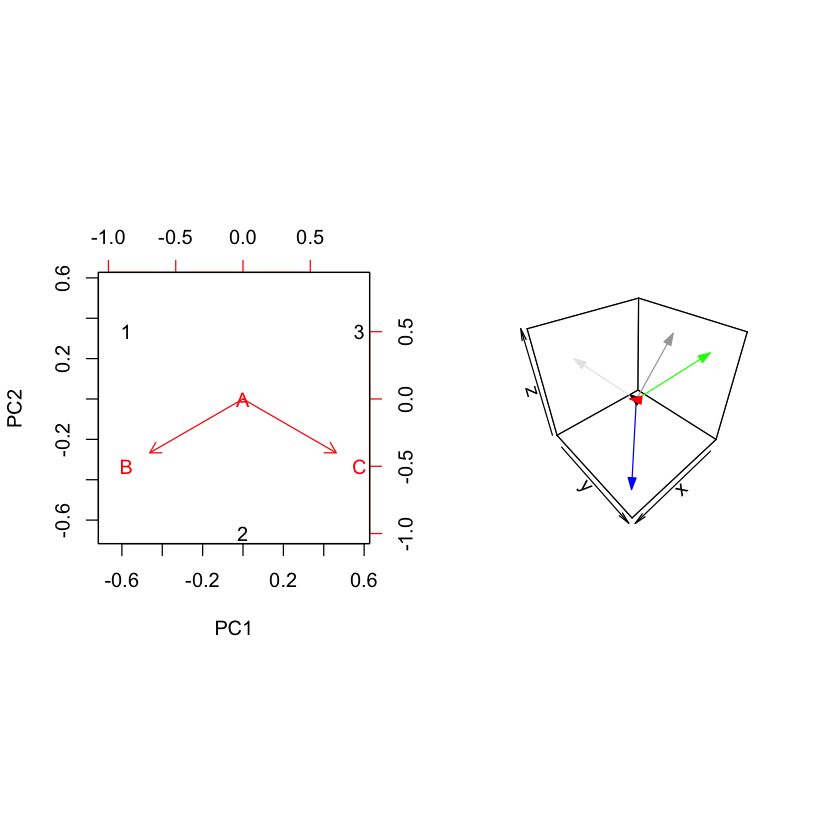

In [165]:
par(mfrow = c(1, 2))
suppressWarnings(biplot(pca)) #There is a warning generated because of the zeros in the matrix
arrows3D(x0 = orig[1,], y0 = orig[2,], z0 = orig[3,],
         x1 = tip[1,], y1 = tip[2,], z1 = tip[3,], theta=137, phi=37,
         col=c("red", "blue", "green", ucol[1], ucol[2], ucol[3]))

## PCA limitations
Size of the variables affects the alignment of the the resulting components. Therefor, if one variable is significantly larger than the others (perhaps units of millibars versus inHg), the first component will be in the same direction as the first variable. The prcomp function allows for scaling of each variable to avoid this issue. 

If all values are non-negative, the mean subtraction process will cause zeros to occur in the covariance matrix and negatives in the components that may not correspond to anything interpretable.

Were values are very close to means, some entries of the covariance matrix will have very small values. In some cases, this will cause the SVD not to converge.